# Python Bootcamp Day 6
## Multi-dimensional data with xarray, part 2

## Topics for the day
* Review xarray basics 
* Calculate new xarray variables 
* Make simple maps 
* Save a netcdf file from xarray
* Filter data with .where()
* Area-weighted averaging
* Merge datasets together 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Import xarray 
import xarray as xr

## Import Data

**Dataset: ECMWF Ocean Reanalysis System 4 (ORAS4)**

* Reanalysis products aim to provide a complete picture of Earth's past weather and climate. Since our observations are discontinuous in space and time, we combine them with model outputs to generate continuous space/time fields on a grid. This allows us to estimate past environmental variables at any point on the globe, and at various depths in the ocean or altitudes in the atmosphere.
* Period: 1958-2017
* Resolution: Horizontal 1°x1°, 42 vertical levels, about 10m-15m level thickness in upper 200m.
* For more information, see https://www.cen.uni-hamburg.de/en/icdc/data/ocean/easy-init-ocean/ecmwf-ocean-reanalysis-system-4-oras4.html

In [3]:
ocean_temp = xr.open_dataset('https://icdc.cen.uni-hamburg.de/thredds/dodsC/oras4_temp_all')

check xarray variables and dimensions

In [4]:
ocean_temp

<xarray.Dataset>
Dimensions:  (depth: 42, lon: 360, lat: 180, time: 720)
Coordinates:
  * depth    (depth) float32 5.022 15.08 25.16 ... 4.752e+03 5.051e+03 5.35e+03
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1958-01-16 1958-02-14 ... 2017-12-16
Data variables:
    mask     (depth, lat, lon) float32 ...
    thetao   (time, depth, lat, lon) float32 ...
Attributes:
    NCO:                       4.4.6
    nco_openmp_thread_number:  1
    Conventions:               CF-1.1
    title:                     ORAS4 ocean reanalysis
    institution:               ECMWF
    source:                    Interpolated into WOA 1x1 grid and  monthly av...
    references:                http://www.ecmwf.int/products/forecasts/d/char...
    history:                   Tue May 22 09:21:39 2018: ncrename -d dep,dept...

Looking at the metadata, we see that the 'thetao' variable is the sea water potential temperature. Potential temperature removes the effect of pressure on water temperature. Since the differences are small for our purposes, we'll consider it equivalent to the measured temperature. Let's rename this variable to 'temp', so that it's easier for us to remember. 

In [5]:
ocean_temp = ocean_temp.rename({'thetao':'temp'})

# Create Temperature-Depth Plot

Let's look at a line of longitude in the middle of the Atlantic Ocean. Which line of longitude should we select?

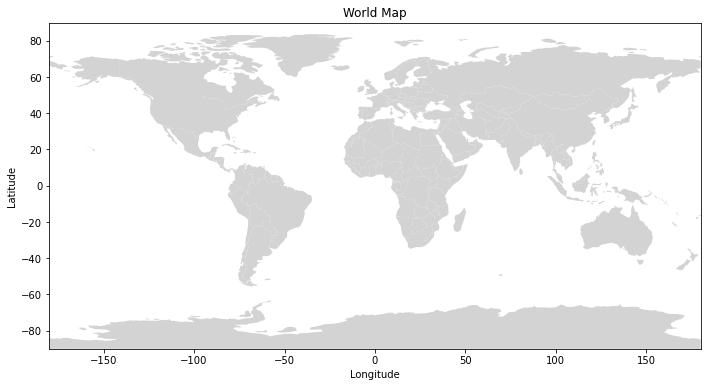

In [6]:
# From GeoPandas, our world map data
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Creating axes and plotting world map
fig, ax = plt.subplots(figsize=(12, 6))
worldmap.plot(color="lightgrey", ax=ax)

# Creating axis limits and title
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title('World Map')
plt.show()

-25 seems to be a good line on longitude that will cut through the Atlantic. The only issue is that our model output has longitude coordinates from 0 to 360 degrees. Let's convert our coordinates to -180 to 180 degrees so that it's easier to select -25. (Also we need to do this so that we can compare this to another dataset later on.)

In [7]:
# Convert coordinates from 0:360 to -180:180
ocean_temp.coords['lon'] = (ocean_temp.coords['lon'] + 180) % 360 - 180
ocean_temp = ocean_temp.sortby(ocean_temp.lon)

Now let's plot our meridional (north/south) cross section. We'll select the most recend time in the dataset by writing `.isel(time=-1)`.

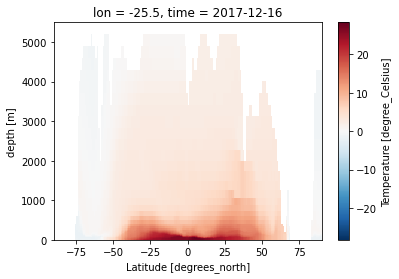

In [8]:
ocean_temp.isel(time=-1).sel(lon=-25.5).temp.plot()

How can we make this plot easier to interpret?

Since this is a 3-dimensional dataset, the `.plot()` function calls `xarray.plot.pcolormesh`. See the documentation [here](https://docs.xarray.dev/en/stable/generated/xarray.plot.pcolormesh.html#xarray.plot.pcolormesh) to see the parameters that we can change.

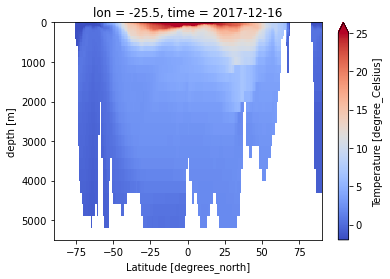

In [9]:
ocean_temp.isel(time=-1).sel(lon=-25.5).temp.plot(vmin=-2, vmax=25, yincrease = False, cmap='coolwarm')

Over the next 5 minutes in the cells below, make a few more plots like the one above but this time with the zonal (east/west) mean instead of the meridional mean. Try playing around with different colorbars ('cmap'), and values of 'vmin' and 'vmax', so that your figures are as clear as possible. Remember that each latitude is defined at the center point, so you will need to add 0.5 when selecting.

Lat = 0:

In [ ]:
# Student version:


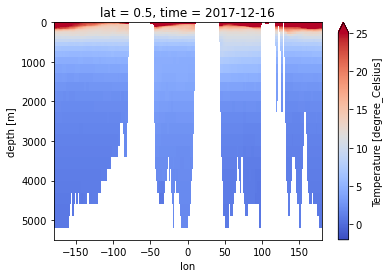

In [10]:
# Answer: 
ocean_temp.isel(time=-1).sel(lat=0.5).temp.plot(vmin=-2, vmax=25, yincrease = False, cmap='coolwarm')

Lat = 30:

In [ ]:
# Student version:


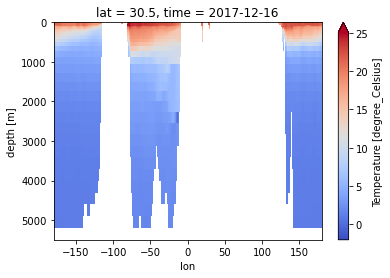

In [11]:
# Answer: 
ocean_temp.isel(time=-1).sel(lat=30.5).temp.plot(vmin=-2, vmax=25, yincrease = False, cmap='coolwarm')

Lat = 80:

In [ ]:
# Student version:


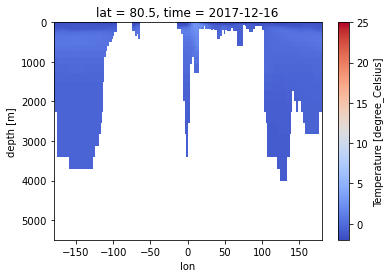

In [12]:
# Answer: 
ocean_temp.isel(time=-1).sel(lat=80.5).temp.plot(vmin=-2, vmax=25, yincrease = False, cmap='coolwarm')

Discussion: what climate features do we see? (2 mins)

# SST analysis

Fill in the the the parenthesis to select the first depth in the dataset. Then select the variable 'temp'

In [ ]:
# Student version: 
ocean_sst = ocean_temp.isel()

In [13]:
# Answer: 
ocean_sst = ocean_temp.isel(depth = 0).temp

### Make a map of mean SST

Take the mean over all time steps 

In [14]:
# This requires a lot of calculations, so it will take a couple minutes to run
ocean_sst_mean = ocean_sst.mean(dim='time')
ocean_sst_mean

<xarray.DataArray 'temp' (lat: 180, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.711015 , -1.7104573, -1.7099012, ..., -1.7127036, -1.7121382,
        -1.7115743],
       [-1.7160426, -1.7157636, -1.7154882, ..., -1.7168964, -1.7166092,
        -1.716324 ],
       [-1.7234251, -1.7233713, -1.7233157, ..., -1.7235793, -1.7235271,
        -1.7234758]], dtype=float32)
Coordinates:
    depth    float32 5.022
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

In [15]:
ocean_sst_mean

<xarray.DataArray 'temp' (lat: 180, lon: 360)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [-1.711015 , -1.7104573, -1.7099012, ..., -1.7127036, -1.7121382,
        -1.7115743],
       [-1.7160426, -1.7157636, -1.7154882, ..., -1.7168964, -1.7166092,
        -1.716324 ],
       [-1.7234251, -1.7233713, -1.7233157, ..., -1.7235793, -1.7235271,
        -1.7234758]], dtype=float32)
Coordinates:
    depth    float32 5.022
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

Now, let's make a map! Looking at the variable 'ocean_sst_mean' we see that is is a DataArray with two dimensions: lat and lon. Therefore, we can make a map using the same function that we used above, `.plot()`.

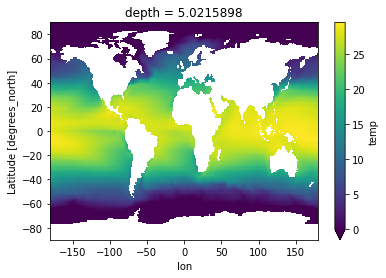

In [16]:
ocean_sst_mean.plot(vmin=0)

In [ ]:
# Save output as a netcdf (we will use this for the challenge later)
ocean_sst_mean.to_netcdf('sst_climatology_era5.nc')

### Plot temperature anomaly over time

Take annual average:

In [17]:
ocean_sst_annual = ocean_sst.groupby('time.year').mean('time')

Now take the mean over the entire globe:

In [ ]:
# Student version: 
ocean_sst_global_mean =

In [18]:
# Answer: 
ocean_sst_global_mean = ocean_sst_annual.mean(dim=['lat', 'lon'])

Calculate annual anomaly:

First, we need to calculate the climatology (take the mean over all years). Without assigning a new variable to this array, how could we calculate this?

In [ ]:
# Student version: 


In [19]:
# Answer: 
ocean_sst_global_mean.mean(dim='year')

<xarray.DataArray 'temp' ()>
array(13.778751, dtype=float32)
Coordinates:
    depth    float32 5.022

Now we can subtract the climatology from the annual mean:

In [20]:
ocean_sst_anom = ocean_sst_global_mean - ocean_sst_global_mean.mean(dim='year')

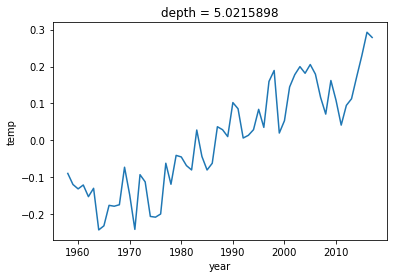

In [21]:
ocean_sst_anom.plot()

## Where is temperature increasing at the greatest rate?

calculating linear trend:

In [22]:
sst_trends = ocean_sst_annual.polyfit(dim = 'year', deg = 1) 

In [23]:
sst_trends = sst_trends.sel(degree = 1)

In [24]:
sst_trends.plot()

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

Why doesn't this work? Remember that `.plot()` only works with DataArrays. Even though our Dataset only has one data variable, we need to explicitly call it in order to create the plot. 

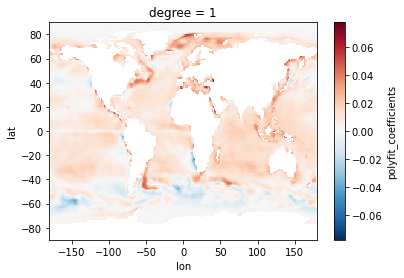

In [25]:
sst_trends.polyfit_coefficients.plot()

### Are all depths warming the same amount?

At one lat/lon point, make a plot of mean temperate as a function of depth and year. 

In [26]:
# Select a point 
depth_temp_trend = ocean_temp.sel(lat=70.5, lon=-10.5).temp

In [27]:
# Take the annual mean
depth_temp_trend = depth_temp_trend.groupby('time.year').mean('time')

Now, try making the plot.

In [ ]:
# Student version: 


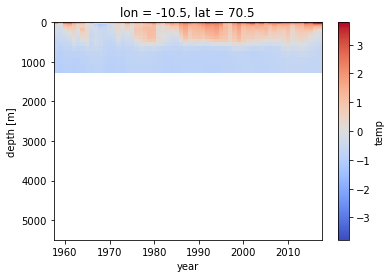

In [28]:
# Answer: 
depth_temp_trend.plot(y='depth', yincrease = False, cmap='coolwarm')

Here is makes sense to manually adjust the length of the yaxis using 'ylim' so that we aren't showing depths deeper than the ocean at that location. Set 'ylim' to the ocean depth at this point.

In [ ]:
# Student version: 


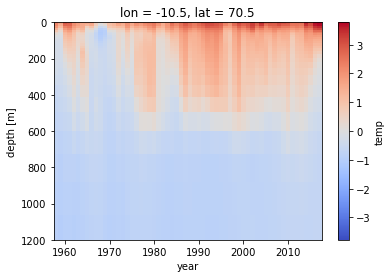

In [29]:
# Answer: 
depth_temp_trend.plot(y='depth', yincrease = False, cmap='coolwarm', ylim = 1200)

## Calculate average rate within ocean regions

Now we will make a time series plot of southern ocean SSTs but with manually setting the lat/lon range using xr.where()

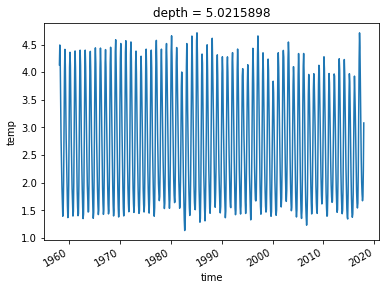

In [30]:
ocean_sst.where(np.logical_and(ocean_sst.lat>-60, ocean_sst.lat<-50), drop = True).where(np.logical_and(ocean_sst.lon>0, ocean_sst.lon >-50), drop = True).mean(dim=['lat', 'lon']).plot()

Why didn't this code run? What happens if we change drop from "True" to "False"?

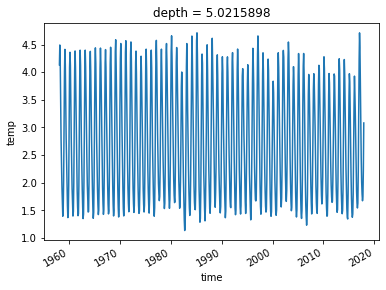

In [31]:
ocean_sst.where(np.logical_and(ocean_sst.lat>-60, ocean_sst.lat <-50), drop = False).where(np.logical_and(ocean_sst.lon>0, ocean_sst.lon >-50), drop = False).mean(dim=['lat', 'lon']).plot()

Now it works!!

Sometimes our region of interest can't be defined simply by a bounding lat/lon box. For example, if we were using at atmospheric dataset, we may want to look at only grid points within the United States or another country. 

Here, we import an ocean biomes dataset. Similar to biomes on land, ocean biomes are defined by certain climate conditions that give rise to unique ecosytems. The ocean biomes here were determines using sea surface temperature, spring/summer chlorophyll-a concentrations, ice fraction, and maximum mixed layer depth.  

(Fay, A. R. and McKinley, G. A.: Global open-ocean biomes: mean and temporal variability, Earth Syst. Sci. Data, 6, 273–284, https://doi.org/10.5194/essd-6-273-2014, 2014.)

In [32]:
biomes = xr.open_dataset('Time_Varying_Biomes.nc')

Xarray has no inherent knowledge of geographic coordinates. So we need to flip the x and y coordinates with the .transpose() function to make a recognizable map.

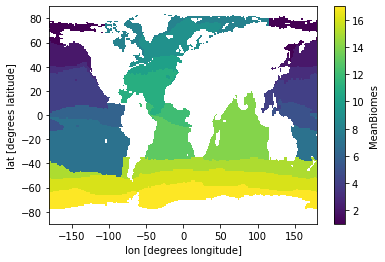

In [33]:
biomes.MeanBiomes.transpose().plot()

Fortunately, this dataset is on the same grid as our climatology dataset (check the lat, lon variable metadata to be sure). To merge these two datasets, we can simply set a new 'biomes' variable to our existing dataset like this: 

In [34]:
ocean_sst['biomes'] = biomes.MeanBiomes

Now we can select our region of interest:

In [35]:
north_atlantic_sst = ocean_sst.where(biomes.MeanBiomes.isin([8,9]), drop = True)

Select a time range (1960-1980): 

(array([3.16718e+05, 1.03246e+05, 9.48260e+04, 9.19070e+04, 7.97080e+04,
        4.64350e+04, 2.12000e+04, 5.70200e+03, 1.02400e+03, 2.10000e+02]),
 array([-1.9234289,  0.6504112,  3.2242513,  5.7980914,  8.371931 ,
        10.945771 , 13.519611 , 16.093452 , 18.667292 , 21.241133 ,
        23.814972 ], dtype=float32),
 <BarContainer object of 10 artists>)

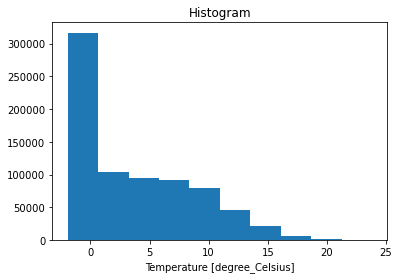

In [36]:
north_atlantic_sst.sel(time=slice('1960-01-01','1979-12-01')).plot()

Why do we get a histogram instead of a map here?

We have multiple time steps! To make maps, we can either take the mean, or make make column faceted plots. First, let's calculate the mean. Complete the code below to calculate the mean over the time dimension, and create a simple map.

In [ ]:
# Student version: 
north_atlantic_sst.sel(time=slice('1960-01-01','1979-12-01'))

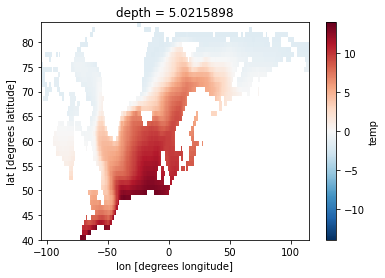

In [38]:
# Answer: 
north_atlantic_sst.sel(time=slice('1960-01-01','1979-12-01')).mean(dim='time').plot()

Taking the mean hides a lot of information. For example, how does the temperature in this region vary seasonally? To investigate this, let's look at one year of data and make column faceted plots. Here we specify that we want to plot each timestep in separate columns by setting `col = 'time'`. The `col_wrap` parameter specifies how many columns we want.

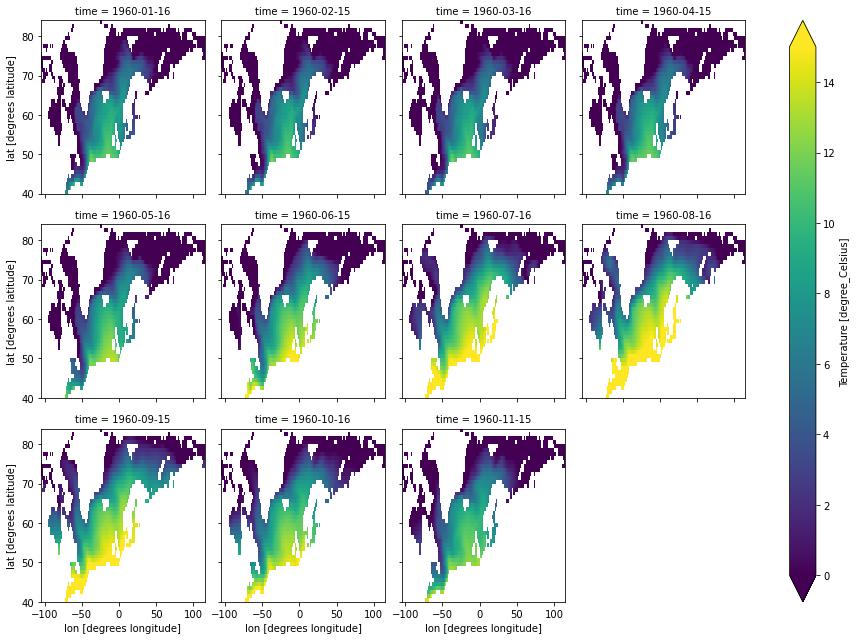

In [39]:
north_atlantic_sst.sel(time=slice('1960-01-01','1960-12-01')).plot(col = 'time', col_wrap = 4,
                                                                  vmin = 0, vmax = 15)

Now let's make a timeseries plot of temperature, taking the mean over the entire region. 

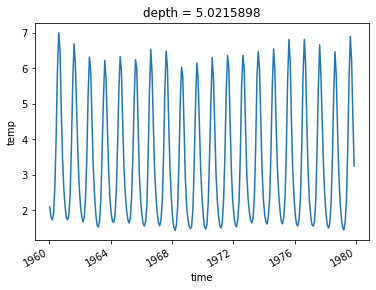

In [40]:
north_atlantic_sst.sel(time=slice('1960-01-01','1979-12-01')).mean(dim=['lat', 'lon']).plot()

What is the overall mean for this region over all time steps and lat/lon?

In [41]:
north_atlantic_sst.mean()

<xarray.DataArray 'temp' ()>
array(3.6691902, dtype=float32)
Coordinates:
    depth    float32 5.022

### Calculate area-weighted average

The size of a degree is much larger near the equator than the poles. As a result, when calculating spatial averages we need to weight each grid cell according to its actual area. We can do this easily by taking the cosine of the latitude. We can see in the plot below that the weight of each grid cell decreases as we move poleward.  

In [42]:
# Area weight
area_weights = np.cos(np.deg2rad(north_atlantic_sst.lat))
area_weights.name = "area weights"

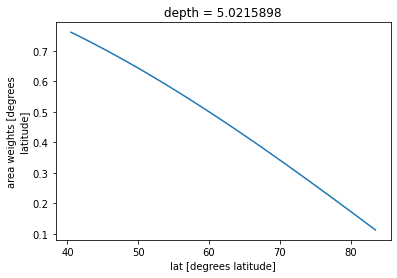

In [43]:
area_weights.plot()

Notice how the area weights decrease as latitude increases. Now let's take the average again, applying the area weights

In [44]:
north_atlantic_sst.weighted(area_weights).mean()

<xarray.DataArray 'temp' ()>
array(5.12873679)
Coordinates:
    depth    float32 5.022

How does this compare to the value we calculated previously?
What about our time series plot? Let's see if that changes at all when we apply the area weights.

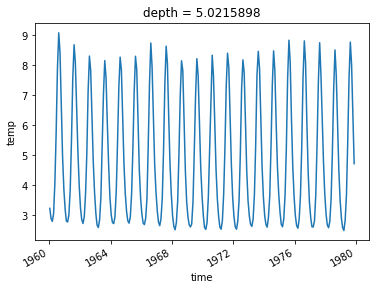

In [45]:
north_atlantic_sst.sel(time=slice('1960-01-01','1979-12-01')).weighted(area_weights).mean(dim=['lat', 'lon']).plot()

Our mean value is now much warmer that what we calculated without the area weights. This makes sense becuase the grid cells closer to the poles are artifically large. 

# Conclusion 
We're now done with the lecture portion of today! We hope that you are now comfortable working with multidimensional datasets in xarray. But we know it's complicated, so don't worry if you are still feeling a little lost. As you move on to the challenge activity, and later to your future research, here are some useful links to xarray documentation and tutorials. 

**Helpful resources:**
* Xarray documentation: https://xarray.pydata.org/en/v0.7.1/index.html or https://docs.xarray.dev/en/stable/index.html
* Pangeo Gallery: http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/xarray.html
* Earth Lab Tutorials: https://www.earthdatascience.org/tutorials/